In [12]:
# 학습 데이터 생성

import torch

x_train = torch.FloatTensor([[1],[2],[3],[4],[5],[2.5],[3.5],[0],[3.1],[2.7],[2.8],[2.9]]) 
y_train = torch.FloatTensor([[1],[1],[1],[0],[0],[0],[0],[1],[0],[1],[1],[1]])

In [13]:
# 가중치, 편향치, LR 초기화

W = torch.zeros(1,1, requires_grad=True) 
b = torch.zeros(1,1, requires_grad=True)
lr = 1.0

In [14]:
optimizer = torch.optim.SGD([W, b], lr=1.0)

for epoch in range(3001):
  hypothesis = torch.sigmoid(x_train @ W + b)
  cost = torch.mean(
      -y_train * torch.log(hypothesis)
      - (1 - y_train) * torch.log(1 - hypothesis)
  )

  optimizer.zero_grad() 
  cost.backward() 
  optimizer.step()

  if epoch % 100 == 0:
    print(f'epoch: {epoch}, cost: {cost.item()}, W: {W.squeeze()}, b: {b}')

epoch: 0, cost: 0.6931471824645996, W: -0.15416669845581055, b: tensor([[0.0833]], requires_grad=True)
epoch: 100, cost: 0.4202210009098053, W: -1.4512814283370972, b: tensor([[4.4069]], requires_grad=True)
epoch: 200, cost: 0.39872148633003235, W: -1.8984334468841553, b: tensor([[5.7738]], requires_grad=True)
epoch: 300, cost: 0.3908204138278961, W: -2.1743228435516357, b: tensor([[6.6096]], requires_grad=True)
epoch: 400, cost: 0.38700875639915466, W: -2.3673288822174072, b: tensor([[7.1916]], requires_grad=True)
epoch: 500, cost: 0.3849243223667145, W: -2.5106256008148193, b: tensor([[7.6225]], requires_grad=True)
epoch: 600, cost: 0.3836987316608429, W: -2.620779037475586, b: tensor([[7.9532]], requires_grad=True)
epoch: 700, cost: 0.3829435408115387, W: -2.707397222518921, b: tensor([[8.2128]], requires_grad=True)
epoch: 800, cost: 0.38246282935142517, W: -2.7765965461730957, b: tensor([[8.4200]], requires_grad=True)
epoch: 900, cost: 0.38214942812919617, W: -2.8325209617614746, b

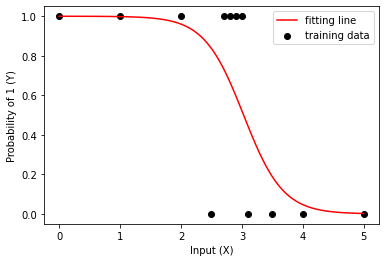

In [16]:
import matplotlib.pyplot as plt

W.requires_grad_(False)
b.requires_grad_(False)

plt.scatter(x_train, y_train, c='black', label='training data')
X = torch.linspace(0, 5, 100).unsqueeze(dim=1)
Y = torch.sigmoid(X @ W + b)
plt.plot(X, Y, c='#ff0000', label='fitting line')
plt.legend()
plt.ylabel("Probability of 1 (Y)") 
plt.xlabel("Input (X)")
plt.show()